
# Multilayer Percpetron (MLP): XOR Problem

- [Introducion to the problem](#introduction-to-the-problem)
- [MLP *(Multilayer perceptron)*: Theory]()
- [Implementation](#implementation)
  - [Function that print the boundary decision](#boundary-decision-plot-function)
  - [MLP implementation with Keras](#mlp-implementation-with-keras)
- [Python script to try the model](#python-script-to-try-the-model)
- [Model architecture](#model-architecture)
- [Boundary decision plot](#boundary-decision-plot)
- [Dependencies](#dependencies)
- [References](#references)
- [Author](#author)

## Introduction to the problem

In this work we try to explain how we can solve the problem of XOR port with neural networks, `1969` Minsky and Papert showed that the **single layer percpetron** does not solve this problem because a percpetron sets the weight only with the linear separation surface, but in the XOR case this solution is not appropriate because the two inputs of the XOR are not linear.

The solution to this problem is the MLP (Multilayer Percpetron), because in MLP case we can divide fine the boundary decision areas of our XOR gates.

![XOR truth table](./images/XOR_truth_table.svg)

*XOR gate truth table*

## MLP: Theory

MLP networks are fully-connected feed-forward networks, with the term feed-forward means the property of the network to flow information "forward" within the network, In essence, the information found in a neuron in layer `i` can only be drawn to layer `i+1`.

The MLP networks ensure the **best approximation property**, the best approximation property tells us that a MLP with only one dense hidden layer composed of an adequate number of neurons produces a set of functions that can approximate any continuous function in $\mathbb{R}^{n}$ with a very small arbitrary error.

![MLP Architecture](./images/MLP.png)

## Implementation

Now we can see the code that implements the MLP to solve the XOR problem, our code explaination is divided in two different block:

1. Plot of the boundary decision
2. Main code that create a model in `keras` for the XOR problem

### Boundary Decision plot function

This function is used to plot the boundary decision of our model.

In [8]:
import matplotlib.pyplot as plt

# Function that plot the boundary precision of our model
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Print boundary decision
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    # Print all points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlabel('A')
    plt.ylabel('B')
    plt.title('Decision Boundary')
    plt.show()

### MLP implementation with Keras

The next block contain the implementation of the MLP model using Keras framework and tensorflow.

In [9]:
import numpy as np
import tensorflow as tf
from keras import Sequential, layers

# Number of neurons that compose the hidden layer
neurons = 10

# Dataset
X_train = ([[0,0],[0,1],[1,0],[1,1]])   # input data
y_train = ([[0],[1],[1],[0]])           # output label

# Init model
model = Sequential()

model.add(layers.Dense(neurons, activation="relu", input_dim=2)) # hidden layer
model.add(layers.Dense(1, activation="sigmoid", input_dim=2))    # output layer

# Compute the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(x=X_train, y=y_train, epochs=1000, batch_size=16, verbose=0)

Epoch 1/1000
1/1 [==============================] - 0s 460ms/step - loss: 0.7802 - accuracy: 0.2500
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7792 - accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7781 - accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7770 - accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7760 - accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7750 - accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7739 - accuracy: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7729 - accuracy: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7719 - accuracy: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7709 - ac

In this part of the code we can see some information about our model, boundary decision plot included:

1/1 [==============================] - 0s 119ms/step - loss: 0.1671 - accuracy: 1.0000
Loss:  0.16709782183170319
Accuracy:  1.0
1/1 [==============================] - 0s 57ms/step
Predictions:  [[0.25059164]
 [0.85867375]
 [0.8988597 ]
 [0.11390002]]
458/458 [==============================] - 0s 793us/step


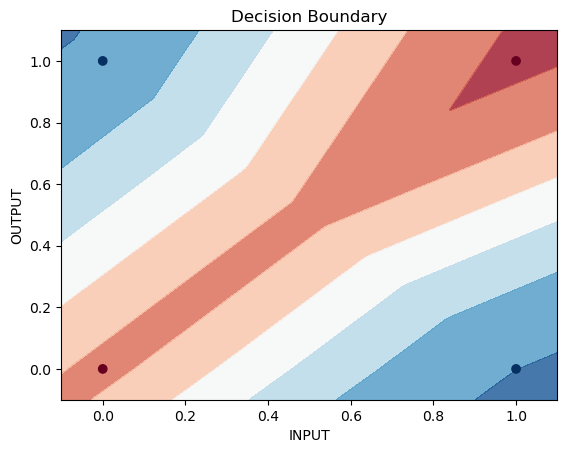

In [10]:
loss, accuracy = model.evaluate(X_train, y_train)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

predictions = model.predict(X_train)
print("Predictions: ", predictions)

plot_decision_boundary(np.array(X_train),np.array(y_train), model)

# If you want to save your model on your file system uncomment next code line
#model.save("MLP_XOR.h5")

## Python script to try the model

In this repository you can find a python script named `MLP_XOR_tester.py`, you can run this program to see the result produced by our model.

This program read a model `MLP_XOR.h5`, if the model not exists the program provide to a train a new model.

## Model architecture

Here you can see the architecture of the our trained model using the `Netron`

![Netron Model architecture](./images/MLP_XOR_model_architecture.svg)

## Boundary decision plot

In this first plot we can see how the single layer perceptron cannot divide the two non linear input of the XOR gate:

![Boundary decision in a Single layer perceptron](./images/XOR%20problem%20with%20single%20layer%20percptron.png)

MLP can solve the XOR gate problem and here you can see how the boundary decision is divided with only one hidden layer:

![Boundary decision with MLP and one hidden layer](./images/Boundary%20decision%20plot%20with%20MLP.png)

MLP with two hidden layer, the solution is more accurate:

![Boundary decision with MLP and two hidden layer](./images/Boundary%20decision%20with%202%20hidden%20layers.png)

## Dependencies

* `Tensorflow`
* `Keras`
* `Matplotlib`
* `Numpy`

## References

[Tensorflow](https://www.tensorflow.org/?hl=it)

[Keras](https://www.tensorflow.org/guide/keras?hl=it)

[Minsky and Papert: 'Percpetron' Paper](https://dl.acm.org/doi/abs/10.5555/50066)

[Netron](https://netron.app/)

## Author
Emilio Garzia, 2024